# Data Preparation & EDA FINAL

Ecommerce sales data


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 20)
%matplotlib inline  

### Load the data into DataFrame

In [36]:
path='data.csv'
data=pd.read_csv(path, encoding='ISO-8859-1') #specify encoding to deal with different formats

### Read the n first rows and n last rows

In [37]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [38]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


Each line of the dataset corresponds to an order made by a customer

In [39]:
data.shape

(541909, 8)

we have 541909 rows and 8 columns in the dataset

Task 1:

    1.rename the columns to lowercase
    2. rename text from column "description" to lower case  

##### 1 - Renaming columns label and row 

In [40]:
#1.rename the columns to lowercase and put an underscore to separate the column name

data.columns=[str.lower() for str in data.columns]   #or dataset.columns=map(str.lower, dataset.columns) 
data=data.rename(columns = {'invoiceno': 'invoice_no',  
                            'stockcode':'stock_code',                                  
                          'invoicedate': 'invoice_date',
                            'unitprice': 'unit_price', 
                            'customerid':'customer_id',
            
                           }, inplace=False)

#2.rename text from column "description" to lower case

#data['description'] = [str.lower() for str in data['description']] -> this method give an error so I using this other method:
data['description']=data['description'].str.lower()


#see how it looks:
data.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [41]:
#making a copy of the dataset
dataset=data.copy() 

#### Understanding the data
Displaying Data Types

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   customer_id   406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Even though the first 3 columns are objects, we can see from the data that we have mixed columns..
The file  contains over 540,000 transactions made by the customers.

invoive_date - contains the date of the purchase,

columns: invoice_no, stock_no and customer_id - is a unique identifier for each transactions and customer,

column description - contain information about the product,

columns Country - contain the location of the store,

the columns (quantity and unit_price) indicate the number of items purchased and the unit price per product.

Tasks:
    1. check for types of the data
 
    2. check missing values (we have missing values in customer_id and description)
    
    3. Check Duplicated value

#### task 2: Checking data types

In [ ]:
dtypeCount =[dataset.iloc[:,i].apply(type).value_counts() for i in range(dataset.shape[1])]
#putting the result into a dataframe for better understanding:
pd.DataFrame(dtypeCount)

In [44]:
#Changing data type
dataset['invoice_date']=pd.to_datetime(dataset['invoice_date'])
dataset['customer_id']=dataset['customer_id'].astype(int)


ValueError: Cannot convert non-finite values (NA or inf) to integer

invoice_data was set to datetime correctly because it doesn´t have missing values but relatively to customer_id, we get an ValueError because we have missing values in the column. To solve this, we must first drop the missing values.


#### Checking missing values

In [45]:
#check missing value sorting data by descending order
import sidetable
dataset.stb.missing(style=True)

,missing,total,percent
customer_id,"135,080","541,909",24.93%
description,"1,454","541,909",0.27%
invoice_no,0,"541,909",0.00%
stock_code,0,"541,909",0.00%
quantity,0,"541,909",0.00%
invoice_date,0,"541,909",0.00%
unit_price,0,"541,909",0.00%
country,0,"541,909",0.00%


In [46]:
#let´s check null data in description column and customer_id:

dataset[(dataset['description'].isnull()) & (dataset['customer_id'].isnull()) ]


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


We have some option to deal with missing values. since we saw that description column has mixed values (string and float)
we could also confirm that the floats values are NaN, so we could just make an imputation with 'unknow_item'.

But we will see later that it doesn´t matter if we fulfill the descritpion column with unknow_item because the column also match with the NaN values in the customer_id, wich will be also dropped from the data.

We must drop customer_id rows without entries, because we cannot replace them with another value since our column is a random system-generated value. 


In [47]:
dataset.dropna(axis=0, subset=['customer_id'], inplace=True)
#check the data
dataset.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

Know we can see that description column doesn´t have the float type. :)


In [48]:
dataset.description.apply(type).value_counts()

<class 'str'>    406829
Name: description, dtype: int64

In [49]:
dataset.shape

(406829, 8)

After removing the missing values from the data, we are left with 406,829 rows

##### checking data types

Now that we have the missing values removed, we can change the customer_id type

In [50]:
#changing customer_id and changing the usage memory:

dataset['customer_id']=dataset['customer_id'].astype(str)
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  object        
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


##### checking for duplicates


In [51]:
#total of duplicated rows in our dataset

print('total of duplicated rows in our dataset: {}'.format(dataset.duplicated().sum()))
 

total of duplicated rows in our dataset: 5225


In [52]:
#checking where the Duplicated rows are:
dataset[dataset.duplicated()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
517,536409,21866,union jack flag luggage tag,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,hand warmer scotty dog design,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,set 2 tea towels i love london,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,scottie dog hot water bottle,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,round snack boxes set of 4 skulls,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,black pirate treasure chest,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,box of 6 mini vintage crackers,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,revolver wooden ruler,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,wicker star,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [53]:
#dropping ALL duplicte values 
dataset.drop_duplicates(keep = False, inplace=True) 


In [54]:
dataset.shape

(396767, 8)

In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396767 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    396767 non-null  object        
 1   stock_code    396767 non-null  object        
 2   description   396767 non-null  object        
 3   quantity      396767 non-null  int64         
 4   invoice_date  396767 non-null  datetime64[ns]
 5   unit_price    396767 non-null  float64       
 6   customer_id   396767 non-null  object        
 7   country       396767 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


# Searching for Outliers

#### Let's get start with Descriptive statistics

##### A. Summary data of numeric variables:

In [57]:
dataset.describe().round(2)

,quantity,unit_price
count,396767.00,396767.00
mean,12.30,3.49
std,251.78,70.19
min,-80995.00,0.00
25%,2.00,1.25
50%,5.00,1.95
75%,12.00,3.75
max,80995.00,38970.00


Questions:
You may be asking:

1. why invoice_no is not considered a numeric data as it is a column with numbers?. 
2. Why quantity column has negative values?; 
3. what about unit_price. how and why the minimum value is 0? 

Let´s take a look at those features one by one:


###### 1. Invoice_no column

In [58]:
dataset['invoice_no'].value_counts().to_frame()

,invoice_no
576339,542
579196,533
580727,529
578270,442
573576,435
...,...
C562367,1
C537677,1
538501,1
C554001,1


This doesn’t convey much information as the output contains 22190 categories for every value of Invoice_no.
Instead, let’s use another method

the column has text (starting by letter C) corresponding to 8905 rows, and numbers that correspond to 396767, as shown bellow. how can we explain this?

In [32]:
invoice_no_startswith_c=dataset['invoice_no'].str.startswith('C').value_counts()
print('\nEntries that start with letter C:')
print('\n')
print(invoice_no_startswith_c)


Entries that start with letter C:


False    397924
True       8905
Name: invoice_no, dtype: int64


In [122]:
"""Numeric values present in invoice_no column?"""
#checking whether we have numeric values present in a given column of a DataFrame:

print('\nEntries that start with letter C:')
print('\n')
pd.DataFrame(list(map(lambda x: x.isdigit(), dataset['invoice_no']))).value_counts()


Entries that start with letter C:




True     387923
False      8844
dtype: int64

Those negative values on quantity column seems that it corresponds to each invoice_no that has been cancelled. we can verified this defining a command to grab only the negative values. as a result it return us, a dataframe where the invoice_no started by letter C. (Eg. C543611)

In [60]:
#negative values:
negative=dataset[dataset['quantity'] < 0]
pd.DataFrame(negative.value_counts())

0
invoice_no stock_code description                        quantity invoice_date        unit_price customer_id country          
C581569    84978      hanging heart jar t-light holder   -1       2011-12-09 11:58:00 1.25       17315.0     United Kingdom  1
C551348    22990      cotton apron pantry design         -100     2011-04-28 09:49:00 4.25       12415.0     Australia       1
C551464    22147      feltcraft butterfly hearts         -12      2011-04-28 16:15:00 1.45       13085.0     United Kingdom  1
C551463    23152      ivory sweetheart wire letter rack  -2       2011-04-28 16:13:00 3.75       13534.0     United Kingdom  1
           23142      ivory wire kitchen organiser       -1       2011-04-28 16:13:00 10.40      13534.0     United Kingdom  1
...                                                                                                                         ..
C567348    85123A     white hanging heart t-light holder -1       2011-09-19 15:57:00 2.95       15755.0     United Kingdom  1
C567349    23110      parisienne key cabinet             -1       2011-09-19 16:01:00 5.75       13375.0     United Kingdom  1
C567350    23169      classic glass cookie jar           -4       2011-09-19 16:02:00 4.15       17677.0     United Kingdom  1
C567351    22941      christmas lights 10 reindeer       -2       2011-09-19 16:05:00 7.65       15251.0     United Kingdom  1
C536379    D          discount                           -1       2010-12-01 09:41:00 27.50      14527.0     United Kingdom  1

[8844 rows x 1 columns]

##### B. Graphical visualization of numeric data

<AxesSubplot:xlabel='quantity'>

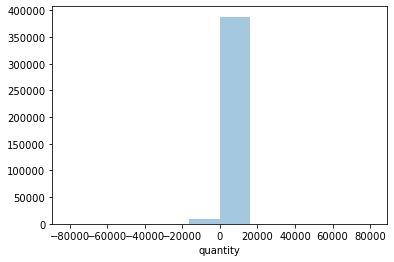

In [62]:
#This can be checked by plotting a graph and examining if we are close to a normal spread.
sns.distplot(dataset['quantity'], bins=10, kde=False)

<AxesSubplot:xlabel='unit_price'>

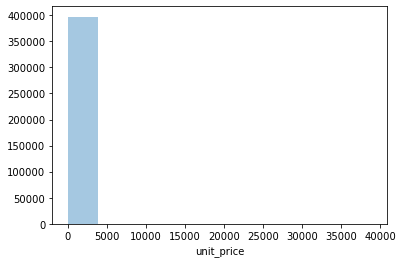

In [109]:
sns.distplot(dataset['unit_price'], bins=10, kde=False)

all the quantity data is centered in the middle. If we look at the Max and Min value, we see that the maximum value is 80995 and the minimun is -80995 ,

Observations to the table above:
   
Therefore, we observe that out of the 397,924 rows,Interquantile range analysis tells us that most of the values lie between 2 and 12 and values greater than 12 introduces us to Outliers. to know more about outliers we have to Get relevant percentiles and see their distribution.   

In [63]:
"""to find the outliers of the quantity column using the IQR method, we have to define 
a multiplier which is 1.5 ideally that will decide how far below Q1 and above Q3 will be considered as an Outlier.:"""
#Q1 is the first quartile (25th percentile) and Q3 is the third quartile(75th percentile).

#Step 1: Find the 25th percentile (Q1), the 75th percentile (Q3)
Q1 = dataset["quantity"].quantile(0.25)
Q3 = dataset["quantity"].quantile(0.75)


#step 2: Find the interquartile range.
IQR = Q3 - Q1

print('25th Percentile:', Q1)
print('75th Percentile:', Q3)
print('Interquartile Range:', IQR) 


#Step 3: Insert the values from Step 1 into the formulas and solve:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)

print('Lower fence value:', Lower_Fence)
print('Upper fence value:', Upper_Fence)



25th Percentile: 2.0
75th Percentile: 12.0
Interquartile Range: 10.0
Lower fence value: -13.0
Upper fence value: 27.0


Any value below Q1-1.5*IQR or above Q3+1.5*IQR is an Outlier

<AxesSubplot:>

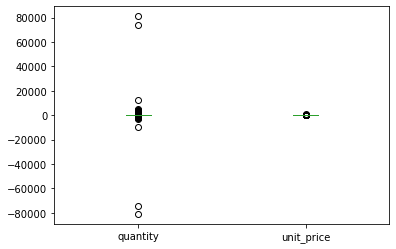

In [112]:
"""Now we find the upper fence and lower fence,  by adding the following code we can
plot all the data above the upper fence and below the lower fence. Add the following code to do this:"""

#To print all the data below the lower fence or above the upper fence, we add the following code:
data1=dataset[((dataset["quantity"] < Lower_Fence) |(dataset["quantity"] > Upper_Fence))]

#Plot the upper and lower fences on a box plot. Not necessarily statistically, but it makes outliers easier to spot
data1.plot.box()

<AxesSubplot:>

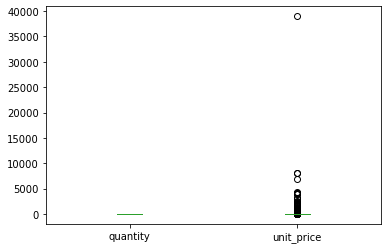

In [113]:
"""Filter out the outlier data and print only the potential data. To do so,
just negate the preceding result using the ~ operator:"""

data=dataset[~((dataset["quantity"] < Lower_Fence) |(dataset["quantity"] > Upper_Fence))].copy()
data.plot.box()

In [114]:
data.describe()

,quantity,unit_price
count,370153.000000,370153.000000
mean,6.938758,3.629776
std,6.787860,72.655912
min,-13.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,27.000000,38970.000000


In [115]:
#find outlier int unit_price column.
data[data['unit_price']>=10000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
222681,C556445,M,manual,-1,2011-06-10 15:31:00,38970.0,15098.0,United Kingdom


In [116]:
#delete outlier
data.drop([222681], inplace=True)

<AxesSubplot:>

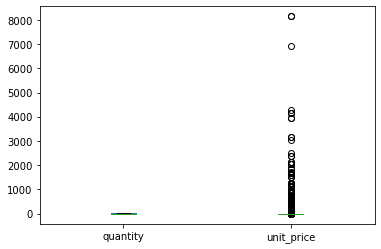

In [117]:
data.plot.box()

In [119]:
final=data.copy()
final.shape

(370152, 8)

### saving the result of cleaning data process

In [120]:
final.to_csv('./Final_ecommerce.csv', index = False, header=True)

# Exploratory data analysis FINAL - Part 2

##### LET´S MAKE SOME QUESTIONS TO OUR DATASET

In [125]:
data=pd.read_csv('./Final_ecommerce.csv', encoding='ISO-8859-1', dtype={'customer_id': str,'invoice_no': str})


import dateutil
# Convert invoice_date from object type to date times
data['invoice_date'] = data['invoice_date'].apply(dateutil.parser.parse, dayfirst=True)


In [126]:
#Extract month and year together from column in Pandas:
data['year_month'] = pd.to_datetime(data['invoice_date']).dt.to_period('M')

#Extract month, year, day and hour separetly from column 'invoice_date':
data['year']=data['invoice_date'].dt.year
data['month']=data['invoice_date'].dt.month
data['day']=data['invoice_date'].dt.day
data['hour']=data['invoice_date'].dt.hour

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370152 entries, 0 to 370151
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    370152 non-null  object        
 1   stock_code    370152 non-null  object        
 2   description   370152 non-null  object        
 3   quantity      370152 non-null  int64         
 4   invoice_date  370152 non-null  datetime64[ns]
 5   unit_price    370152 non-null  float64       
 6   customer_id   370152 non-null  object        
 7   country       370152 non-null  object        
 8   year_month    370152 non-null  period[M]     
 9   year          370152 non-null  int64         
 10  month         370152 non-null  int64         
 11  day           370152 non-null  int64         
 12  hour          370152 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5), period[M](1)
memory usage: 36.7+ MB


In [128]:
#summary statistics of object variables
data.describe(include=np.object).T

,count,unique,top,freq
invoice_no,370152,20660,576339,535
stock_code,370152,3665,22423,1784
description,370152,3871,regency cakestand 3 tier,1784
customer_id,370152,4274,17841.0,7614
country,370152,37,United Kingdom,330908


In [129]:
#create revenue column
data['revenue']=data['unit_price']*data['quantity']

In [130]:
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year_month,year,month,day,hour,revenue
0,536365,85123A,white hanging heart t-light holder,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01,2010,1,12,8,15.30
1,536365,71053,white metal lantern,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01,2010,1,12,8,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01,2010,1,12,8,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01,2010,1,12,8,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01,2010,1,12,8,20.34


### Track Sales 

In [131]:
   
print('years present in the dataset:')
print(data['year'].unique())

years present in the dataset:
[2010 2011]


##### Task 1: what was the total orders per country?

In [133]:
import sidetable
data.stb.freq(['country'], style=True, thresh=98.5)


,country,count,percent,cumulative_count,cumulative_percent
0,United Kingdom,"330,908",89.40%,"330,908",89.40%
1,Germany,"8,929",2.41%,"339,837",91.81%
2,France,"7,938",2.14%,"347,775",93.95%
3,EIRE,"6,584",1.78%,"354,359",95.73%
4,Spain,"2,403",0.65%,"356,762",96.38%
5,Belgium,"1,992",0.54%,"358,754",96.92%
6,Switzerland,"1,682",0.45%,"360,436",97.38%
7,Portugal,"1,381",0.37%,"361,817",97.75%
8,Norway,928,0.25%,"362,745",98.00%
9,Netherlands,791,0.21%,"363,536",98.21%


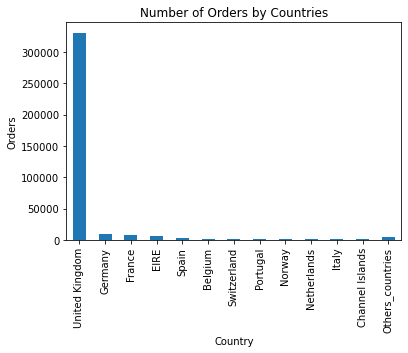

In [134]:
#plotting the values:

serie1=data.country.value_counts()
serie2=serie1.iloc[:12]

others_countries=sum(serie1)-sum(serie2) 

a=pd.Series(serie2)
b=pd.Series(others_countries, index=['Others_countries'])

count=a.append(b)
count.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Orders')
plt.title('Number of Orders by Countries')
plt.show()

###### Task 2: Total sales TOP 5 countries

In [135]:
total_sales = data.groupby('country')['revenue'].sum()

print('\n Total sales TOP 5 countries')
total_sales.sort_values(ascending=False).to_frame().head(5)  


 Total sales TOP 5 countries


,revenue
country,
United Kingdom,4304380.644
Germany,178366.770
France,156672.650
EIRE,136780.410
Switzerland,40769.910


## Analyzing a specific country: United Kingdom

In [136]:
#create a new dataframe with only United Kingdom data.
revenueUK=data[data['country']== 'United Kingdom'].copy()

#create two new dataset divided into two years
data2010uk=revenueUK[revenueUK['year']==2010]
data2011uk=revenueUK[revenueUK['year']==2011]

###### Task 1: what was the total sales per year in UK?

In [137]:
total=revenueUK.groupby(['year']).agg(sales=pd.NamedAgg(column='revenue', aggfunc='sum'),
                                                orders=pd.NamedAgg(column='invoice_no', aggfunc='count'),
                                           )
print('\nTotal sales and total orders in United Kingdom per year:')
total.T


Total sales and total orders in United Kingdom per year:


year,2010,2011
sales,297538.09,4006842.554
orders,22083.00,308825.000


Task 2: Best month for sales per years

In [150]:
best_month2010 = data2010uk.groupby(['year_month']).agg(sales=pd.NamedAgg(column='revenue', aggfunc='sum'),
                                                orders=pd.NamedAgg(column='invoice_no', aggfunc='count'),)

print('\nBest month of sales in 2010:')
best_month2010.sort_values(by='sales', ascending=False)

#or individualment:
# dataUK.groupby(['month'], as_index=True)[['invoice_no']].agg('count')
# as_index=False, by default is False.


Best month of sales in 2010:


,sales,orders
year_month,,
2010-12,125870.42,8626
2010-02,26940.24,1790
2010-08,24254.45,1697
2010-01,21165.25,1586
2010-06,19771.82,1746
2010-09,19464.19,1483
2010-05,18907.90,2232
2010-10,14871.47,1163
2010-07,14610.98,906


In [151]:
best_month2011 = data2011uk.groupby(['year_month']).agg(sales=pd.NamedAgg(column='revenue', aggfunc='sum'),
                                                orders=pd.NamedAgg(column='invoice_no', aggfunc='count'),)

print('\nBest month of sales in 2011:')
best_month2011.sort_values(by='sales', ascending=False)

#or individualment:
# dataUK.groupby(['month'], as_index=True)[['invoice_no']].agg('count')
# as_index=False, by default is False.


Best month of sales in 2011:


,sales,orders
year_month,,
2011-11,541759.800,45318
2011-10,448091.110,36026
2011-09,444441.602,31636
2011-05,345704.330,24547
2011-06,332045.650,27249
2011-07,330708.091,26187
2011-08,318337.650,24405
2011-04,306156.811,23108
2011-03,297806.570,23078


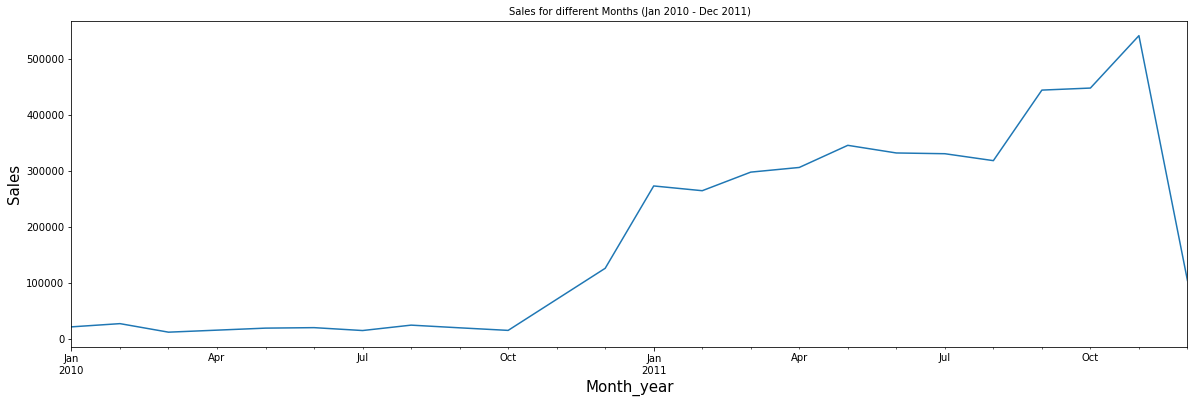

In [152]:
#Graphically
ax = revenueUK.groupby('year_month')['revenue'].sum().sort_index().plot(kind='line', figsize=(20,6))

ax.set_xlabel('Month_year',fontsize=15)
ax.set_ylabel('Sales',fontsize=15)
ax.set_title('Sales for different Months (Jan 2010 - Dec 2011)',fontsize=10)

plt.show()

#### Task 2: What are the number of clients and products in these entries for different years (in UK)?

In [139]:
revenueUK.shape[0]
#The dataframe contains aprox. 330908 entries.


330908

In [140]:
df1=pd.DataFrame({'products': data2010uk['stock_code'].nunique(),    
               'transactions': data2010uk['invoice_no'].nunique(),
               'customers': data2010uk['customer_id'].nunique(),  
              }, index = ['quantity_2010'])

df2=pd.DataFrame({'products': data2011uk['stock_code'].nunique(),    
               'transactions': data2011uk['invoice_no'].nunique(),
               'customers': data2011uk['customer_id'].nunique()}, index =['quantity_2011'])
    

    
frames = [df1, df2]
result = pd.concat(frames)        

print('\nTotal number of products, transactions and customers by years')
pd.DataFrame(result)


Total number of products, transactions and customers by years


,products,transactions,customers
quantity_2010,2347,1441,829
quantity_2011,3570,16986,3750


It can be seen that the data in 2011 concern 3750 clients and that they bought 3570 different products. The total number of transactions carried out is in order of aprox. 17000. 




#### Task 3: determine the number of products purchased in every transaction:

In [145]:
tim = data2011uk.groupby(by=['customer_id', 'invoice_no'], as_index=False)['invoice_date'].count()
nb_products = tim.rename(columns = {'invoice_date':'Number of products'})
nb_products.loc[500:510].sort_values('customer_id')

,customer_id,invoice_no,Number of products
500,12924.0,546035,7
501,12924.0,554655,5
502,12924.0,566421,13
503,12924.0,C546783,1
504,12925.0,568230,23
505,12925.0,580599,21
506,12928.0,549749,21
507,12928.0,560107,15
508,12928.0,572563,19
509,12928.0,574533,7


##### Task 4: Number of transactions corresponding to canceled orders

In [149]:
#count the number of transactions corresponding to canceled orders:
nb_products['order_canceled'] = nb_products['invoice_no'].apply(lambda x:int('C' in x)).copy()
display(nb_products.loc[500:510])


#calculating the number of orders canceled
n1 = nb_products['order_canceled'].sum()
n2 = nb_products.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,customer_id,invoice_no,Number of products,order_canceled
500,12924.0,546035,7,0
501,12924.0,554655,5,0
502,12924.0,566421,13,0
503,12924.0,C546783,1,1
504,12925.0,568230,23,0
505,12925.0,580599,21,0
506,12928.0,549749,21,0
507,12928.0,560107,15,0
508,12928.0,572563,19,0
509,12928.0,574533,7,0


Number of orders canceled: 2679/16986 (15.77%) 


##### 2. How many orders per day, How many orders per hour?

In [153]:
data2011uk.head(2)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year_month,year,month,day,hour,revenue
24126,539993,22386,jumbo bag pink polkadot,10,2011-04-01 10:00:00,1.95,13313.0,United Kingdom,2011-04,2011,4,1,10,19.5
24127,539993,21499,blue polkadot wrap,25,2011-04-01 10:00:00,0.42,13313.0,United Kingdom,2011-04,2011,4,1,10,10.5


In [154]:
# +1 to make Monday=1.....until Sunday=7

data2011uk['week']=(data2011uk['invoice_date'].dt.dayofweek)+1
data2011uk.head(1)

C:\Users\candi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year_month,year,month,day,hour,revenue,week
24126,539993,22386,jumbo bag pink polkadot,10,2011-04-01 10:00:00,1.95,13313.0,United Kingdom,2011-04,2011,4,1,10,19.5,5


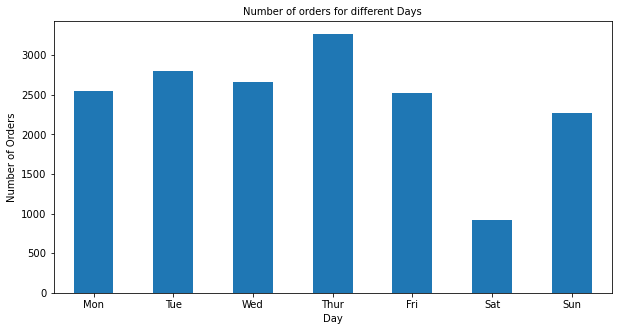

In [155]:
ax = data2011uk.groupby('invoice_no')['week'].unique().value_counts().sort_index().plot(kind='bar', figsize=(10,5))
ax.set_xlabel('Day',fontsize=10)
ax.set_ylabel('Number of Orders',fontsize=10)
ax.set_title('Number of orders for different Days',fontsize=10)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun', ), rotation='horizontal', fontsize=10)
plt.show()

In [156]:
data2011uk['hour'].sort_values(ascending=True).unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int64)

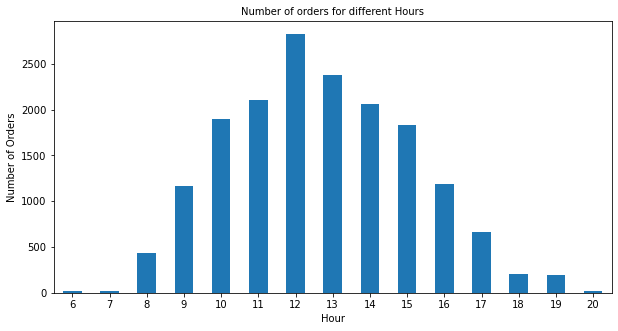

In [157]:
ax = data2011uk.groupby('invoice_no')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(10,5))

ax.set_xlabel('Hour',fontsize=10)
ax.set_ylabel('Number of Orders',fontsize=10)
ax.set_title('Number of orders for different Hours',fontsize=10)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=10)
plt.show()

